In [41]:
pip install pandas scikit-learn

In [42]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv("C:/Users/USER/Downloads/archive (7).zip")

In [44]:
df.head

<bound method NDFrame.head of                                                 title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text      type  
0   Hi James,\n\nHave you claim your complimentary...      spam  
1   \nalt_text\nCongratulations, you just earned\n...  not spam  
2   Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3   Hello,\n \nThank 

In [45]:
df['type'] = df['type'].map({'spam': 1, 'not spam': 0})

In [46]:
print(df)

                                                title  \
0                           ?? the secrets to SUCCESS   
1                     ?? You Earned 500 GCLoot Points   
2                          ?? Your GitHub launch code   
3   [The Virtual Reward Center] Re: ** Clarifications   
4   10-1 MLB Expert Inside, Plus Everything You Ne...   
..                                                ...   
79  Your application for the position of  Child Pr...   
80     Your Kilimall Account is Ready - Shopping Now!   
81  Your Steam account: Access from new web or mob...   
82                 Your uploaded document is rejected   
83   You've Earned a Reward from Bard Explorers India   

                                                 text  type  
0   Hi James,\n\nHave you claim your complimentary...     1  
1   \nalt_text\nCongratulations, you just earned\n...     0  
2   Here's your GitHub launch code, @Mortyj420!\n ...     0  
3   Hello,\n \nThank you for contacting the Virtua...     0  
4   H

In [47]:
def wordopt(title):
    title = title.lower()
    title = re.sub('\[.*?\]', '',title)
    title = re.sub("\\W"," ",title)
    title = re.sub('http?://\S+|www.\.\S+','',title)
    title = re.sub('<.*?>+','',title)
    title = re.sub('[%s]'% re.escape(string.punctuation),'',title)
    title = re.sub('\n', '', title)
    title = re.sub('\w*\d\w*', '',title)
    return title

In [48]:
df['title'] =df['title'].apply(wordopt)

In [49]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('http?://\S+|www.\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '',text)
    return text

In [50]:
df['text'] =df['text'].apply(wordopt)

In [51]:
df['message'] = df['title'] + df['text']


In [52]:
df['message'] = df['message'].apply(wordopt)


In [53]:
df.head

<bound method NDFrame.head of                                                 title  \
0                              the secrets to success   
1                           you earned  gcloot points   
2                             your github launch code   
3                               re     clarifications   
4     mlb expert inside  plus everything you need ...   
..                                                ...   
79  your application for the position of  child pr...   
80     your kilimall account is ready   shopping now    
81  your steam account  access from new web or mob...   
82                 your uploaded document is rejected   
83   you ve earned a reward from bard explorers india   

                                                 text  type  \
0   hi james   have you claim your complimentary g...     1   
1    alttext congratulations  you just earned    y...     0   
2   here s your github launch code       an octoca...     0   
3   hello    thank you for contac

In [54]:
x = df['message']
y = df['type']

In [55]:
print (df.groupby([y]).size())

type
0    58
1    26
dtype: int64


<Axes: xlabel='type', ylabel='count'>

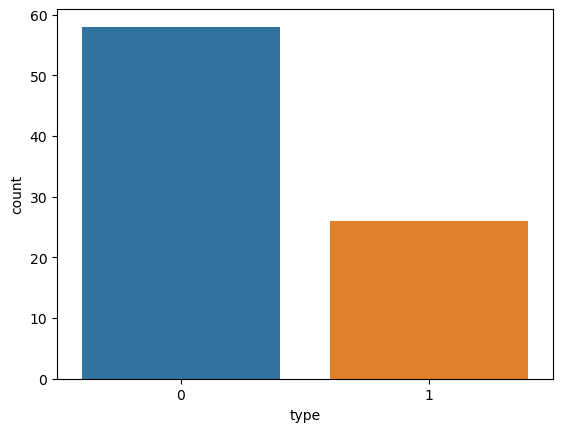

In [56]:
sns.countplot(x="type",data = df)

In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['type'], test_size=0.2, random_state=42)


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()


In [59]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [60]:
# NAIVE BAYES CLASSIFIER
nb_classifier = MultinomialNB() 
nb_classifier.fit(X_train_vectorized, y_train) 

MultinomialNB()

In [61]:
nb_predictions = nb_classifier.predict(X_test_vectorized) 

In [62]:
acc_nb=nb_classifier.score(X_test_vectorized,y_test)

In [63]:
print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print()

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

Accuracy: 0.6470588235294118



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# RANDOM FOREST CLASSIFIER
rf_classifier = RandomForestClassifier()

In [65]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [66]:
rf_predictions = rf_classifier.predict(X_test_vectorized)

In [67]:
acc_rf=rf_classifier.score(X_test_vectorized,y_test)

In [68]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17

Accuracy: 0.7058823529411765


In [69]:
# SUPPORT VECTOR MACHINE CLASSIFIER
svm_classifier = SVC()

In [70]:
svm_classifier.fit(X_train_vectorized, y_train)

SVC()

In [71]:
svm_predictions = svm_classifier.predict(X_test_vectorized)

In [72]:
acc_svm=svm_classifier.score(X_test_vectorized,y_test)

In [73]:
print("Support Vector Machine (SVM) Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17

Accuracy: 0.6470588235294118


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(acc_nb)
print(acc_rf)
print(acc_svm)


0.6470588235294118
0.7058823529411765
0.6470588235294118


In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing function
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('http?://\S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Input from the user
user_input_title = input("Enter the title: ")
user_input_text = input("Enter the text: ")

# Preprocess the user input
user_input_title_processed = wordopt(user_input_title)
user_input_text_processed = wordopt(user_input_text)
user_input_message = user_input_title_processed + " " + user_input_text_processed
# Fit the TF-IDF vectorizer with training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the user input using the fitted vectorizer
user_input_vectorized = vectorizer.transform([user_input_message])


# Predict using the trained classifiers
nb_prediction = nb_classifier.predict(user_input_vectorized)
rf_prediction = rf_classifier.predict(user_input_vectorized)
svm_prediction = svm_classifier.predict(user_input_vectorized)


# Output predictions
print("Naive Bayes Classifier prediction:", nb_prediction)
print("Random Forest Classifier prediction:", rf_prediction)
print("Support Vector Machine (SVM) Classifier prediction:", svm_prediction)
